# Desy based testing and debugging

In [ ]:
from belle2_enhanced_framework import create_belle2_framework
framework = create_belle2_framework(particle_type='vpho', memory_budget_gb=32.0,energy_condition='5S_scan')
processes = framework.load_particle_data(
    "/gpfs/group/belle2/users2022/kyldem/photoneff_updated/parquet_storage/try5",
    particle='vpho'  # Automatically uses VPHO_KEYS columns
)

✅ C++ histogram acceleration: ACTIVE
📊 System analysis:
   Available memory: 651.0 GB
   Optimal chunk size: 1,000,000 elements
📊 Process limits: soft=1024, hard=1024
🔧 Max Python threads: 16
✅ C++ histogram acceleration available

        ╔════════════════════════════════════════════════════╗
        ║          Belle II Layer 2 Framework                ║
        ║                                                    ║
        ║  Memory Budget:  32.0 GB        ║
        ║  C++ Acceleration:  Enabled
        ║  Cache Directory: /home/belle2/kyldem/.belle2_cache        ║
        ╚════════════════════════════════════════════════════╝
        

        ╔════════════════════════════════════════════════════╗
        ║     Belle II Enhanced Production Framework v3      ║
        ║                                                    ║
        ║  ✓ Clean weight/data separation                    ║
        ║  ✓ Unified histogram pipeline                      ║
        ║  ✓ Consistent C++ accelerati

/gpfs/group/belle2/users2022/kyldem/photoneff_updated/belle2_framework_code/layer2_unified_lazy_dataframe.py:808: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  if hasattr(frame, 'schema'):


      ✅ sample_name=P16M16rd_data5S_p16_v2: Loaded with weight=1.0000

   Loading sample_name=P16M16rd_mc5S_gg_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_gg_p16_v1: Loaded with weight=0.5000

   Loading sample_name=P16M16rd_mc5S_uubar_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_uubar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_ee_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_ee_p16_v1: Loaded with weight=9.9999

   Loading sample_name=P16M16rd_mc5S_eeee_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_eeee_p16_v1: Loaded with weight=9.9999

   Loading sample_name=P16M16rd_mc5S_ssbar_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_ssbar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_mumu_p16_COMBINED...


In [ ]:
# !pip3 install polars
# !pip install dill
from belle2_enhanced_framework import create_belle2_framework, ParticleDataLoaderV3
framework = create_belle2_framework(energy_condition='4S_offres')
loader = ParticleDataLoaderV3(particle_type='vpho', config=framework.config)
processes = loader.load_flat_structure(
    base_dir='/pnfs/desy.de/belle/local/user/sraiz/photon_efficiency/gammaEffKLM_Prompt_combinedFilesMerged',
    data_type='selected'  # or 'matched'
    
)


✅ C++ histogram acceleration: ACTIVE
📊 System analysis:
   Available memory: 495.8 GB
   Optimal chunk size: 1,000,000 elements
📊 Process limits: soft=2060546, hard=2060546
🔧 Max Python threads: 16
✅ C++ histogram acceleration available

        ╔════════════════════════════════════════════════════╗
        ║          Belle II Layer 2 Framework                ║
        ║                                                    ║
        ║  Memory Budget:  16.0 GB                     ║
        ║  C++ Acceleration:  Enabled                 ║
        ║  Cache Directory: /afs/desy.de/user/k/kyldem/.belle2_cache║
        ╚════════════════════════════════════════════════════╝
        

        ╔════════════════════════════════════════════════════╗
        ║     Belle II Enhanced Production Framework v3      ║
        ║                                                    ║
        ║  ✓ Clean weight/data separation                   ║
        ║  ✓ Unified histogram pipeline                     ║
    

OSError: [Errno 121] Remote I/O error: '/pnfs/desy.de/belle/local/user/sraiz/photon_efficiency/gammaEffKLM_Prompt_combinedFilesMerged'

In [ ]:
from belle2_enhanced_framework import create_belle2_framework,ParticleDataLoaderV3
from streamlined_belle2_generator import QuickBelle2Generator
from belle2_data_validation import DataValidationFramework

# Step 1: Generate validated test data
# generator = QuickBelle2Generator('./synthetic_test_data')
# files = generator.generate_standard_files(scale=10)  # Start small

# Step 2: Validate structural integrity
# validator = DataValidationFramework()
# for filepath in files.values():
#     report = validator.validate_dataset(filepath)
#     assert report['overall_score'] > 90, f"Validation failed for {filepath}"

# Step 3: Load through standard framework
framework = create_belle2_framework(energy_condition='4S_offres')
loader = ParticleDataLoaderV3(particle_type='vpho', config=framework.config)
processes = loader.load_flat_structure(
    base_dir='./synthetic_test_data',
    data_type='selected'
)

# Step 4: Execute analysis pipeline
results = framework.run_progressive_analysis(
    processes,
    variable='pRecoil',
    bins=100,
    range=(0.1, 6.0),
    stages=['baseline', 'candidates']
    
)


    ═══════════════════════════════════════════════════════════════
                        Belle II Layer 2
                   Compute-First Data Structures
    ═══════════════════════════════════════════════════════════════
    
    Components:
    ├── UnifiedLazyDataFrame
    │   └── Manifests compute graphs as DataFrames
    ├── OptimizedUltraLazyDict
    │   └── Process-aware container with groups
    ├── MaterializationController
    │   └── Intelligent format selection
    ├── GraphOptimizationEngine
    │   └── Automatic compute graph optimization
    └── MemoryAwareExecutor
        └── Adaptive execution with spilling
    
    Key Features:
    • Zero-copy operations through compute graphs
    • Automatic billion-row handling
    • C++ acceleration for critical operations
    • Physics-specific optimizations
    • Full transformation tracking
    
    Usage:
    >>> framework = Belle2Layer2Framework(memory_budget_gb=16.0)
    >>> data = framework.load_processes("/data/belle2/

/afs/desy.de/user/k/kyldem/belle2_framework_code/layer2_unified_lazy_dataframe.py:424: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  if hasattr(frame, 'schema'):


✅ C++ histogram acceleration: ACTIVE
📊 System analysis:
   Available memory: 492.4 GB
   Optimal chunk size: 1,000,000 elements
📊 Process limits: soft=2060546, hard=2060546
🔧 Max Python threads: 16
      ✅ mumu-offprompt: Loaded with weight=0.2629

   Loading ee-offprompt...
      ✅ ee-offprompt: Loaded with weight=10.5153

   Loading taupair-offprompt...
      ✅ taupair-offprompt: Loaded with weight=0.2629

   Loading uubar-offprompt...
      ✅ uubar-offprompt: Loaded with weight=0.2629

   Loading ddbar-offprompt...
      ✅ ddbar-offprompt: Loaded with weight=0.2472

   Loading ssbar-offprompt...
      ✅ ssbar-offprompt: Loaded with weight=0.2472

   Loading ccbar-offprompt...
      ✅ ccbar-offprompt: Loaded with weight=0.2629

   Loading data-offprompt...
      ✅ data-offprompt: Loaded with weight=1.0000
✅ Successfully loaded 8 processes

🎯 PROGRESSIVE ANALYSIS: pRecoil

📊 STAGE: baseline
------------------------------
📊 Histogram computation for 'pRecoil' using CPP_ACCELERATED stra

In [ ]:
# !pip install psutil
from importlib import reload
import belle2_enhanced_framework
reload(belle2_enhanced_framework)
from belle2_enhanced_framework import create_belle2_framework, OptimizedUltraLazyDict
# Run analysis for each variable
# Define variables with their binning
variables = [
    ('pRecoil', 100, (0.1, 6)),

    # ('mu1P', 60, (0, 3)),
    # ('mu2P', 60, (0, 3)),
]
# Define physics cuts
full_cut = 'mu1nCDCHits>4&mu2nCDCHits>4&0.8>mu1clusterEoP&0.8>mu2clusterEoP&2.6179938779914944>pRecoilTheta>0.29670597283903605&11>totalMuonMomentum&absdPhi>1.5707963267948966&2.03>mu1Theta>0.61&2.03>mu2Theta>0.61&(absdPhiMu1>0.4014257279586958|absdThetaMu1>0.4014257279586958)&(absdPhiMu2>0.4014257279586958|absdThetaMu2>0.4014257279586958)&0.35>mu1clusterE&0.35>mu2clusterE&3>abs(m2Recoil)&min_deltaMuPRecoil>-0.01'
user_cuts = full_cut.split('&') if full_cut else []
all_results = {}
for var_name, bins, range_tuple in variables:
    print(f"\n📊 Analyzing {var_name}...")
    results = framework.run_progressive_analysis(
        processes,
        variable=var_name,
        bins=bins,
        range=range_tuple,
        cuts=user_cuts,
        stages=['baseline', 'candidates', 'cuts'],  # Standard progression
    )
    all_results[var_name] = results

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /cvmfs/belle.cern.ch/el9/externals/v02-03-00/Linux_x86_64/common/lib/python3.11/site-packages/PyFastBDT-5.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

    ═══════════════════════════════════════════════════════════════
                        Belle II Layer 2
                   Compute-First Data Structures
    ═══════════════════════════════════════════════════════════════
    
    Components:
    ├── UnifiedLazyDataFrame
    │   └── Manifests compute graphs as DataFrames
    ├── OptimizedUltraLazyDict
    │   └── Process-aware container with groups
    ├── MaterializationController
    │   └── Intelligent format sel

NameError: name 'framework' is not defined

In [ ]:
results

NameError: name 'results' is not defined

In [4]:
import shutil
from pathlib import Path
shutil.rmtree(Path.home() / ".belle2_cache")

# Kekcc based tests and debugging

In [ ]:
# from belle2_enhanced_framework import create_belle2_framework
# framework = create_belle2_framework(particle_type='vpho', memory_budget_gb=32.0,energy_condition='5S_scan')
# processes = framework.load_particle_data(
#     "/gpfs/group/belle2/users2022/kyldem/photoneff_updated/parquet_storage/try5",
#     particle='vpho'  # Automatically uses VPHO_KEYS columns
# )

Layer 0 Unified Implementation v3.1.0 loaded successfully
🔧 Set OMP_NUM_THREADS=8

    ═══════════════════════════════════════════════════════════════
                        Belle II Layer 2
                   Compute-First Data Structures
    ═══════════════════════════════════════════════════════════════
    
    Components:
    ├── UnifiedLazyDataFrame
    │   └── Manifests compute graphs as DataFrames
    ├── OptimizedUltraLazyDict
    │   └── Process-aware container with groups
    ├── MaterializationController
    │   └── Intelligent format selection
    ├── GraphOptimizationEngine
    │   └── Automatic compute graph optimization
    └── MemoryAwareExecutor
        └── Adaptive execution with spilling
    
    Key Features:
    • Zero-copy operations through compute graphs
    • Automatic billion-row handling
    • C++ acceleration for critical operations
    • Physics-specific optimizations
    • Full transformation tracking
    
    Usage:
    >>> framework = Belle2Layer2Frame

/gpfs/group/belle2/users2022/kyldem/photoneff_updated/belle2_framework_code/layer2_unified_lazy_dataframe.py:896: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  if hasattr(frame, 'schema'):


      ✅ sample_name=P16M16rd_mc5S_ccbar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_data5S_p16_v2...
      ✅ sample_name=P16M16rd_data5S_p16_v2: Loaded with weight=1.0000

   Loading sample_name=P16M16rd_mc5S_gg_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_gg_p16_v1: Loaded with weight=0.5000

   Loading sample_name=P16M16rd_mc5S_uubar_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_uubar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_ee_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_ee_p16_v1: Loaded with weight=9.9999

   Loading sample_name=P16M16rd_mc5S_eeee_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_eeee_p16_v1: Loaded with weight=9.9999

   Loading sample_name=P16M16rd_mc5S_ssbar_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_ssbar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_mumu_p16_COMBINED...
      ✅ sample_name=P16M16rd_mc5S_mumu_p16_COMBINED: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_hhIS

In [ ]:
from importlib import reload
import belle2_enhanced_framework
reload(belle2_enhanced_framework)
from belle2_enhanced_framework import create_belle2_framework

framework = create_belle2_framework(particle_type='vpho', memory_budget_gb=32.0, energy_condition='4S_offres')
processes = framework.load_particle_data(
    "/gpfs/group/belle2/users2022/kyldem/photoneff_updated/parquet_storage/try5",
    particle='vpho'
)

variables = [
    ('pRecoil', 50, (0., 6)),
    ('mu1P', 60, (0, 3)),
    ('mu2P', 60, (0, 3)),
]

full_cut = 'mu1nCDCHits>4&mu2nCDCHits>4&0.8>mu1clusterEoP&0.8>mu2clusterEoP&2.6179938779914944>pRecoilTheta>0.29670597283903605&11>totalMuonMomentum&absdPhi>1.5707963267948966&2.03>mu1Theta>0.61&2.03>mu2Theta>0.61&(absdPhiMu1>0.4014257279586958|absdThetaMu1>0.4014257279586958)&(absdPhiMu2>0.4014257279586958|absdThetaMu2>0.4014257279586958)&0.35>mu1clusterE&0.35>mu2clusterE&3>abs(m2Recoil)'#&min_deltaMuPRecoil>-0.01'
user_cuts = full_cut.split('&') if full_cut else []

all_results = {}

# SURGICAL FIX: Just ensure proper replacement
for name in processes:
    processes[name] = processes[name].createDeltaColumns()
    print(f"✓ {name}: delta columns added")

for var_name, bins, range_tuple in variables:
    print(f"\n📊 Analyzing {var_name}...")
    results = framework.run_progressive_analysis(
        processes,
        variable=var_name,
        bins=bins,
        range=range_tuple,
        cuts=user_cuts,
        stages=['baseline', 'candidates', 'cuts'],
    )
    all_results[var_name] = results


✅ C++ histogram acceleration: ACTIVE
📊 System analysis:
   Available memory: 593.2 GB
   Optimal chunk size: 1,000,000 elements
📊 Process limits: soft=1024, hard=1024
🔧 Max Python threads: 16
✅ C++ histogram acceleration available

        ╔════════════════════════════════════════════════════╗
        ║          Belle II Layer 2 Framework                ║
        ║                                                    ║
        ║  Memory Budget:  32.0 GB        ║
        ║  C++ Acceleration:  Enabled
        ║  Cache Directory: /home/belle2/kyldem/.belle2_cache        ║
        ╚════════════════════════════════════════════════════╝
        

        ╔════════════════════════════════════════════════════╗
        ║     Belle II Enhanced Production Framework v3      ║
        ║                                                    ║
        ║  ✓ Clean weight/data separation                    ║
        ║  ✓ Unified histogram pipeline                      ║
        ║  ✓ Consistent C++ accelerati

   📁 Found process: sample_name=P16M16rd_mc_ee_prompt_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_data5S_p16_v2 (1 files)
   📁 Found process: sample_name=P16M16rd_mc_taupair_prompt_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mc_uubar_prompt_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mcoff_ee_p16_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mc_ddbar_prompt_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mcoff_gg_p16_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mc_charged_p16_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mc_uubar_p16_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mc_ee_p16_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mcoff_uubar_p16_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mc5S_gg_p16_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mc_gg_p16_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mc_charged_prompt_v1 (1 files)
   📁 Found process: sample_name=P16M16rd_mc_llXX_p

/gpfs/group/belle2/users2022/kyldem/photoneff_updated/belle2_framework_code/layer2_unified_lazy_dataframe.py:896: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  if hasattr(frame, 'schema'):


      ✅ sample_name=P16M16rd_mcoff_ssbar_p16_v1: Loaded with weight=0.2472

   Loading sample_name=P16M16rd_mcoff_ee_p16_v1...
      ✅ sample_name=P16M16rd_mcoff_ee_p16_v1: Loaded with weight=10.5153

   Loading sample_name=P16M16rd_mcoff_gg_p16_v1...
      ✅ sample_name=P16M16rd_mcoff_gg_p16_v1: Loaded with weight=0.5258

   Loading sample_name=P16M16rd_mcoff_uubar_p16_v1...
      ✅ sample_name=P16M16rd_mcoff_uubar_p16_v1: Loaded with weight=0.2629

   Loading sample_name=P16M16rd_mcoff_ccbar_p16_v1...
      ✅ sample_name=P16M16rd_mcoff_ccbar_p16_v1: Loaded with weight=0.2629

   Loading sample_name=P16M16rd_dataoff_p16_v2...
      ✅ sample_name=P16M16rd_dataoff_p16_v2: Loaded with weight=1.0000

   Loading sample_name=P16M16rd_mcoff_ddbar_p16_v1...
      ✅ sample_name=P16M16rd_mcoff_ddbar_p16_v1: Loaded with weight=0.2472

   Loading sample_name=P16M16rd_mcoff_mumu_p16_COMBINED...
      ✅ sample_name=P16M16rd_mcoff_mumu_p16_COMBINED: Loaded with weight=0.2629

   Loading sample_name=

In [ ]:
# all_results

{'pRecoil': {'variable': 'pRecoil',
  'configuration': {'bins': 50,
   'range': (0.0, 6),
   'cuts': ['mu1nCDCHits>4',
    'mu2nCDCHits>4',
    '0.8>mu1clusterEoP',
    '0.8>mu2clusterEoP',
    '2.6179938779914944>pRecoilTheta>0.29670597283903605',
    '11>totalMuonMomentum',
    'absdPhi>1.5707963267948966',
    '2.03>mu1Theta>0.61',
    '2.03>mu2Theta>0.61',
    '(absdPhiMu1>0.4014257279586958|absdThetaMu1>0.4014257279586958)',
    '(absdPhiMu2>0.4014257279586958|absdThetaMu2>0.4014257279586958)',
    '0.35>mu1clusterE',
    '0.35>mu2clusterE',
    '3>abs(m2Recoil)'],
   'stages': ['baseline', 'candidates', 'cuts'],
   'energy_condition': '5S_scan',
   'luminosity_weighting': True},
  'histograms': {'baseline': {'sample_name=P16M16rd_mc5S_ccbar_p16_v1': (array([  0.        ,   0.        ,   0.        ,   0.        ,
              0.        ,   0.        ,   0.        ,   0.        ,
              0.        ,   0.        ,   0.        ,   0.        ,
              0.        ,   0.    

✓ LaTeX rendering enabled

🎨 BELLE2 VISUALIZATION SUITE

🔍 PROCESS DISCOVERY SUMMARY

$c\bar{c}$           [Color: #8D6E63]
  • P16M16rd_mc5S_ccbar_p16_v1

Data                 [Color: #000000]
  • P16M16rd_data5S_p16_v2

$d\bar{d}$           [Color: #388E3C]
  • P16M16rd_mc5S_ddbar_p16_v1

$e^+e^-$             [Color: #D32F2F]
  • P16M16rd_mc5S_ee_p16_v1

$e^+e^-e^+e^-$       [Color: #4FC3F7]
  • P16M16rd_mc5S_eeee_p16_v1

$e^+e^-\mu^+\mu^-$   [Color: #9575CD]
  • P16M16rd_mc5S_eemumu_p16_v1

$\gamma\gamma$       [Color: #FFD600]
  • P16M16rd_mc5S_gg_p16_v1

Hadronic ISR         [Color: #E91E63]
  • P16M16rd_mc5S_hhISR_p16_v1

$\ell\ell XX$        [Color: #00ACC1]
  • P16M16rd_mc5S_llXX_p16_v1

$\mu^+\mu^-$         [Color: #1E88E5]
  • P16M16rd_mc5S_mumu_p16_COMBINED

$s\bar{s}$           [Color: #FBC02D]
  • P16M16rd_mc5S_ssbar_p16_v1

$\tau^+\tau^-$       [Color: #7B1FA2]
  • P16M16rd_mc5S_taupair_p16_v1

$u\bar{u}$           [Color: #F57C00]
  • P16M16rd_mc5S_uubar_p16_v1

Total: 1


✓ Saved: ./belle2_plots/pRecoil_baseline.pdf

📊 Stage: candidates
----------------------------------------
  MC: $e^+e^-e^+e^-$       -      150 events
  MC: $e^+e^-\mu^+\mu^-$   -       80 events
  MC: $\ell\ell XX$        -       89 events
  MC: Hadronic ISR         -    13524 events
  MC: $\gamma\gamma$       -       96 events
  MC: $c\bar{c}$           -        3 events
  MC: $s\bar{s}$           -      180 events
  MC: $d\bar{d}$           -      441 events
  MC: $u\bar{u}$           -     1329 events
  MC: $\tau^+\tau^-$       -      920 events
  MC: $e^+e^-$             -    16360 events
  MC: $\mu^+\mu^-$         -  1656365 events
  Data:                      -    48495 events

✓ Saved: ./belle2_plots/pRecoil_candidates.pdf

📊 Stage: cuts
----------------------------------------
  MC: $e^+e^-e^+e^-$       -        0 events
  MC: $e^+e^-\mu^+\mu^-$   -      850 events
  MC: $\ell\ell XX$        -      783 events
  MC: Hadronic ISR         -       12 events
  MC: $\gamma\gamma$ 

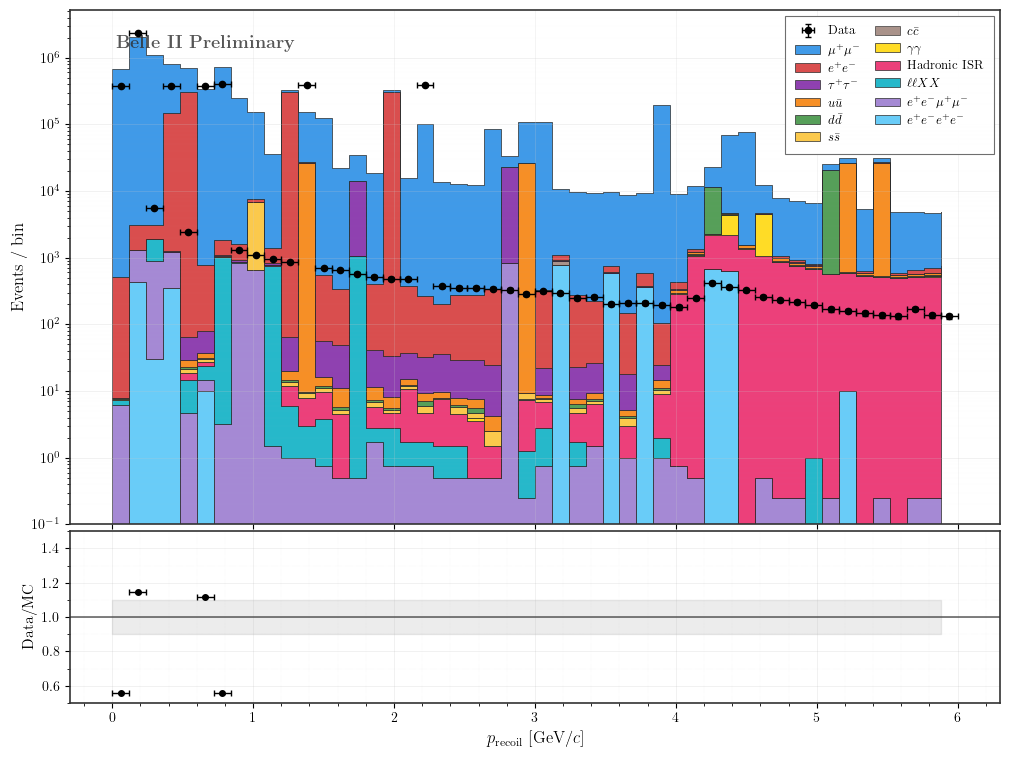

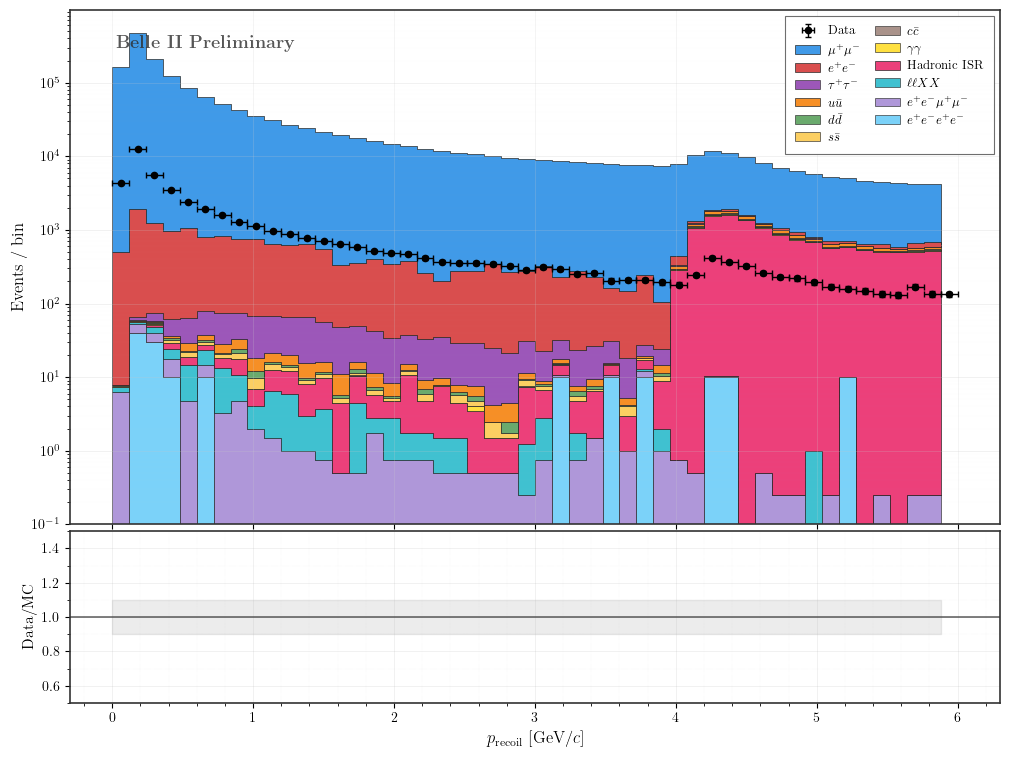

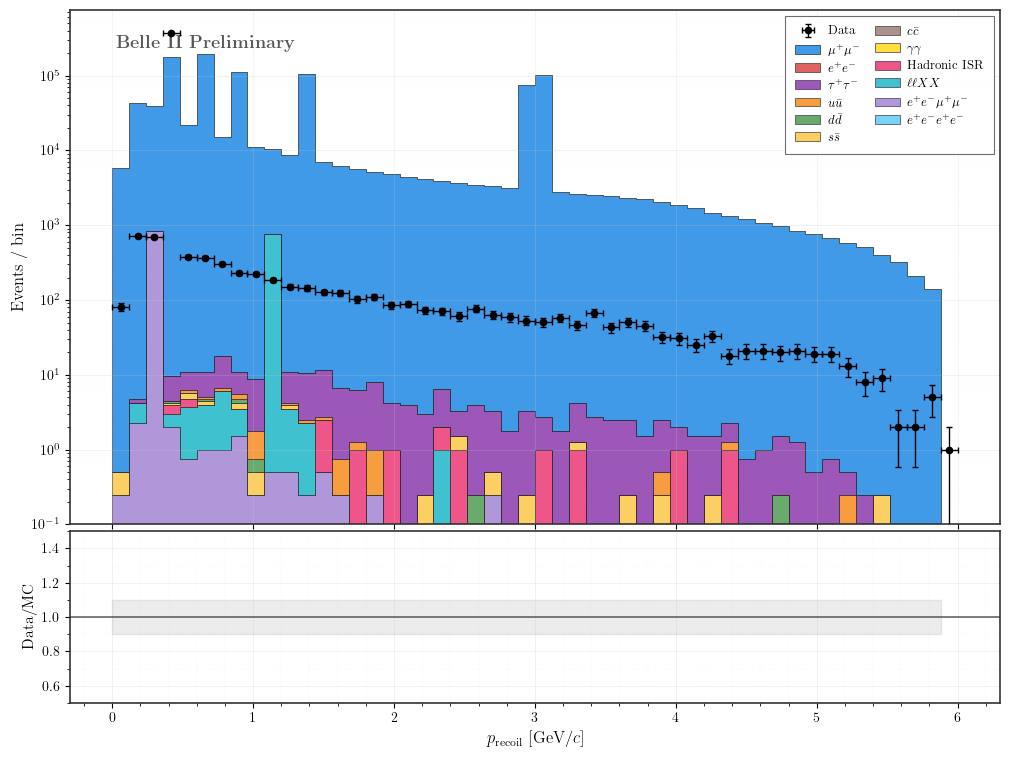

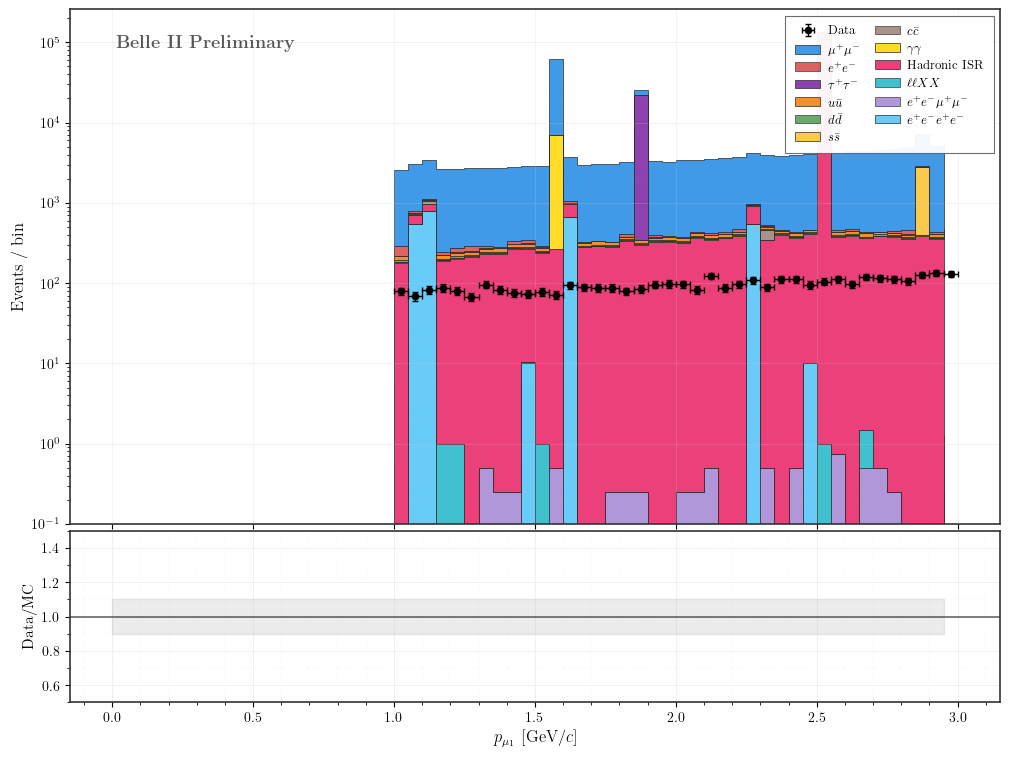

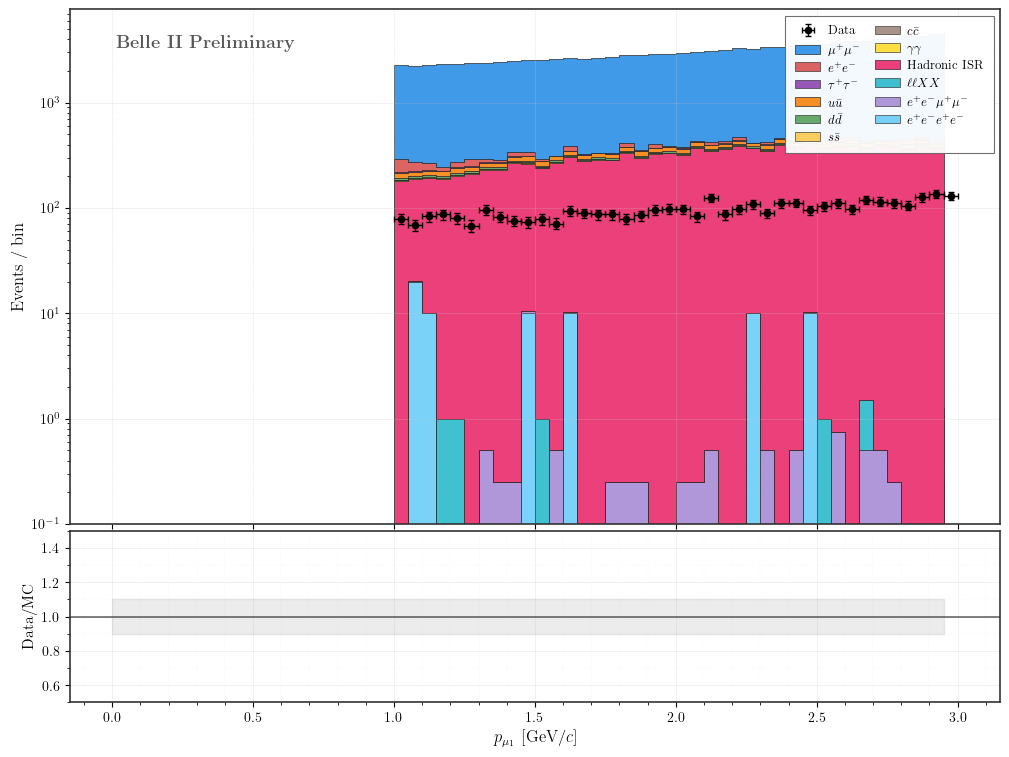

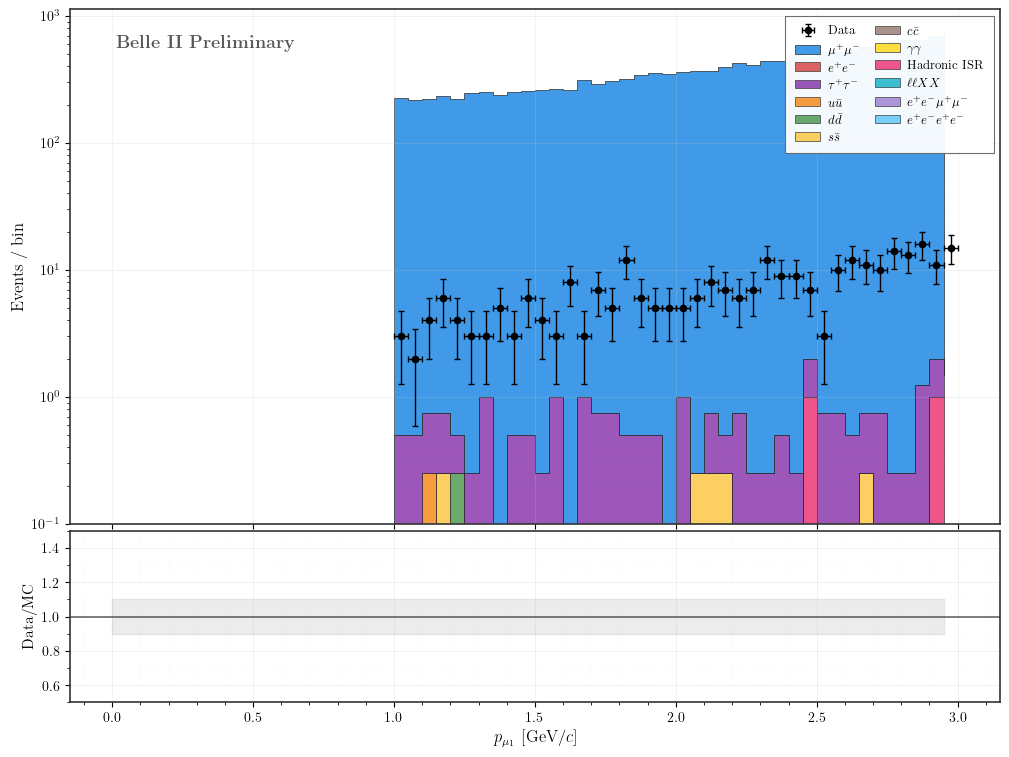

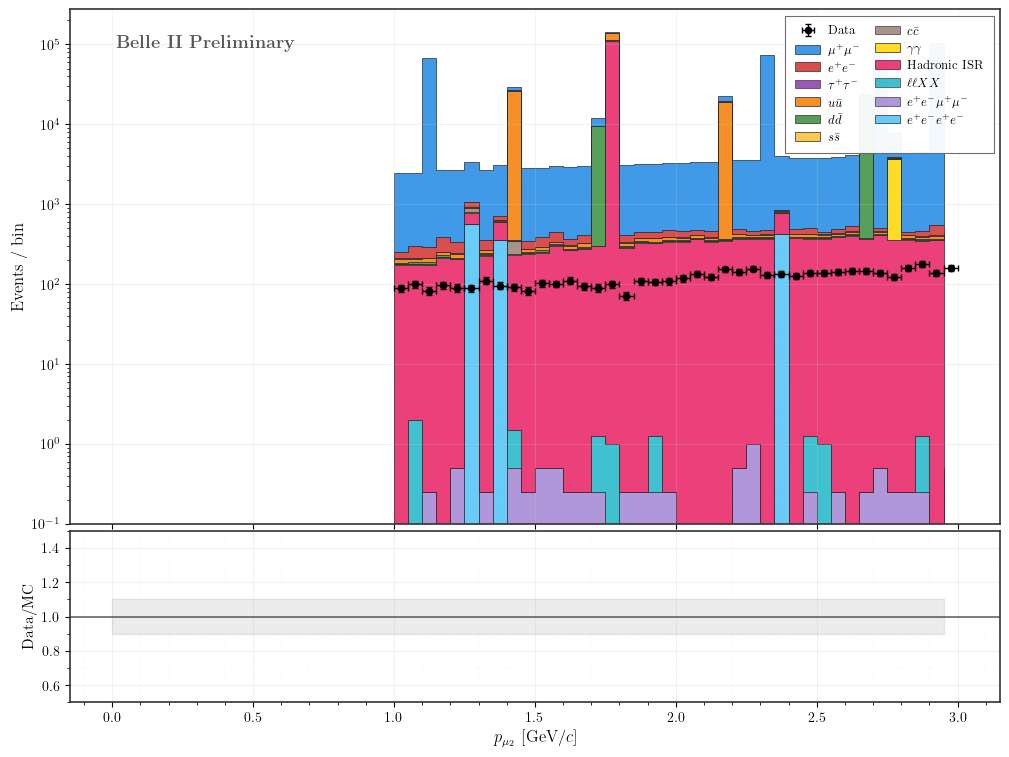

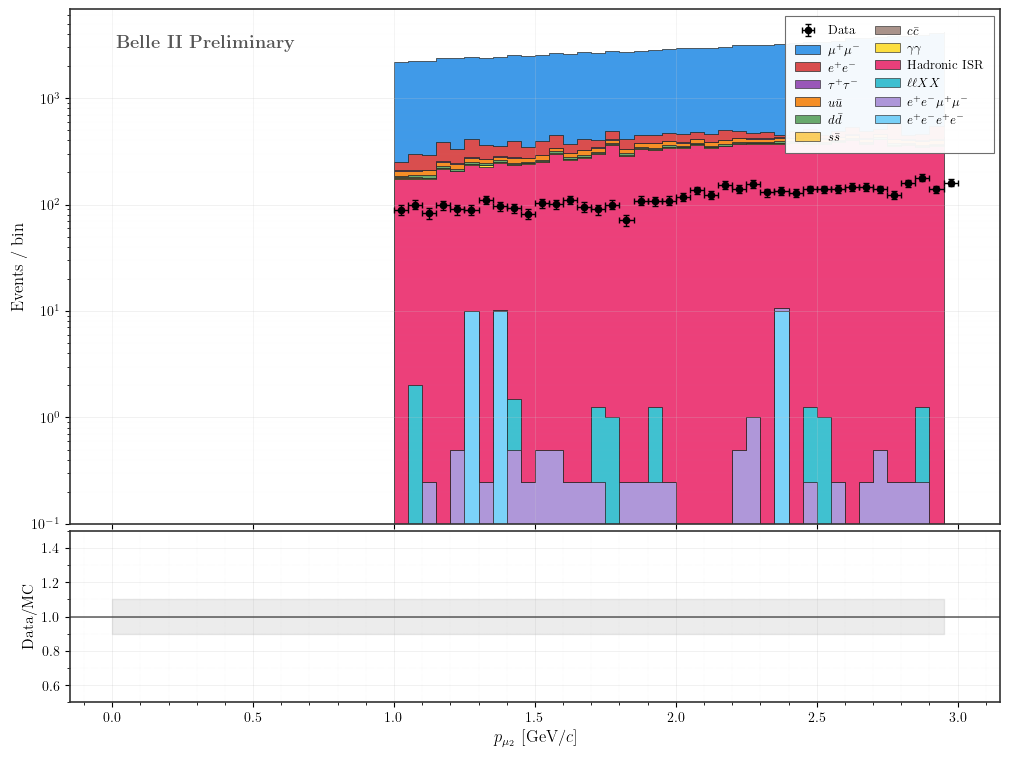

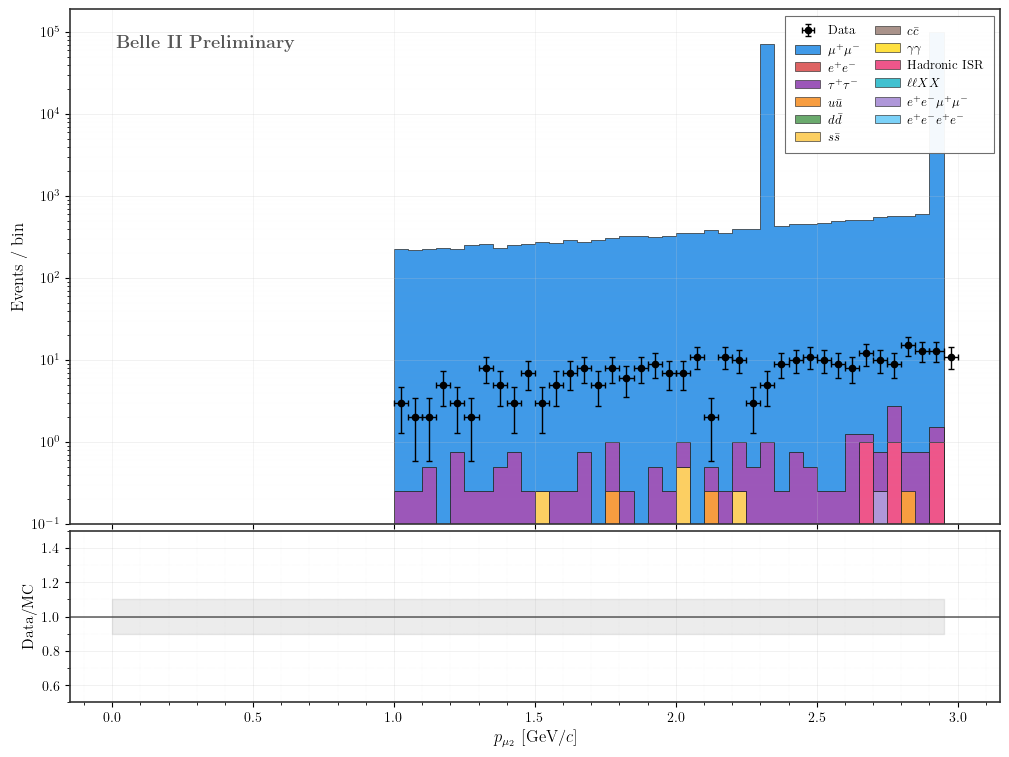

In [ ]:
from importlib import reload
import belle2_histogram_visualizer
reload(belle2_histogram_visualizer)
from belle2_histogram_visualizer import plot_belle2_analysis

figures = plot_belle2_analysis(
    all_results=all_results,
    output_dir='./belle2_plots',
    style='publication',
    show_ratio=True,
    use_latex=True  # Automatic fallback if unavailable
)

In [1]:
from importlib import reload
import belle2_enhanced_framework
reload(belle2_enhanced_framework)
from belle2_enhanced_framework import create_belle2_framework

framework = create_belle2_framework(particle_type='vpho', memory_budget_gb=32.0, energy_condition='5S_scan')
processes = framework.load_particle_data(
    "/gpfs/group/belle2/users2022/kyldem/photoneff_updated/parquet_storage/try5",
    particle='vpho'
)

# First, let's inspect what we're dealing with
print("\n🔍 Inspecting process structure:")
for name in list(processes.keys())[:1]:  # Just check first one
    proc = processes[name]
    print(f"Type of processes['{name}']: {type(proc)}")
    print(f"Has 'df' attribute: {hasattr(proc, 'df')}")
    print(f"Has 'createDeltaColumns' method: {hasattr(proc, 'createDeltaColumns')}")
    if hasattr(proc, 'df'):
        print(f"Type of proc.df: {type(proc.df)}")
        print(f"proc.df has 'createDeltaColumns': {hasattr(proc.df, 'createDeltaColumns')}")
    print(f"Current columns: {proc.columns[:10] if hasattr(proc, 'columns') else 'N/A'}...")

# Now let's try different approaches to apply createDeltaColumns
print("\n🔧 Testing createDeltaColumns approaches:")

# Approach 1: Direct method call (your original)
print("\n1️⃣ Testing direct call:")
test_name = list(processes.keys())[0]
try:
    result = processes[test_name].createDeltaColumns()
    print(f"✅ Direct call succeeded, returned type: {type(result)}")
except Exception as e:
    print(f"❌ Direct call failed: {type(e).__name__}: {e}")

# Approach 2: Call on underlying df
print("\n2️⃣ Testing df attribute call:")
try:
    if hasattr(processes[test_name], 'df'):
        result = processes[test_name].df.createDeltaColumns()
        print(f"✅ df.createDeltaColumns() succeeded, returned type: {type(result)}")
    else:
        print("❌ No 'df' attribute found")
except Exception as e:
    print(f"❌ df call failed: {type(e).__name__}: {e}")

# Approach 3: Proper update (if WeightedDataFrame exists)
print("\n3️⃣ Testing proper WeightedDataFrame update:")
try:
    from belle2_enhanced_framework import WeightedDataFrame
    
    # Create properly updated processes dict
    updated_processes = {}
    for name, weighted_df in processes.items():
        if isinstance(weighted_df, WeightedDataFrame):
            # Get the underlying dataframe and apply createDeltaColumns
            new_df = weighted_df.df.createDeltaColumns()
            # Create new WeightedDataFrame with updated df
            updated_processes[name] = WeightedDataFrame(
                new_df, 
                weighted_df.weight_info,
                weighted_df._histogram_engine
            )
            print(f"✓ {name}: properly updated via WeightedDataFrame")
        else:
            # Fallback - try direct call
            try:
                updated_processes[name] = weighted_df.createDeltaColumns()
                print(f"✓ {name}: updated via direct call")
            except:
                updated_processes[name] = weighted_df
                print(f"⚠️ {name}: kept original (no createDeltaColumns)")
    
    processes = updated_processes
    print("✅ Approach 3 completed")
    
except ImportError:
    print("❌ WeightedDataFrame not importable")
except Exception as e:
    print(f"❌ Approach 3 failed: {type(e).__name__}: {e}")

# Now let's verify the columns were actually added
print("\n🔍 Verifying delta columns:")
for name in list(processes.keys())[:1]:
    proc = processes[name]
    if hasattr(proc, 'columns'):
        cols = proc.columns
    elif hasattr(proc, 'df') and hasattr(proc.df, 'columns'):
        cols = proc.df.columns
    else:
        cols = []
    
    print(f"\n{name} columns ({len(cols)} total):")
    # Check for delta columns
    delta_cols = [c for c in cols if any(x in c for x in ['mu1Pt', 'mu2Pt', 'absdPhi', 'deltaMu', 'min_delta'])]
    if delta_cols:
        print(f"✅ Found delta columns: {delta_cols}")
    else:
        print("❌ No delta columns found!")
    
    # Check specifically for mu1Pt
    if 'mu1Pt' in cols:
        print("✅ mu1Pt is present")
    else:
        print("❌ mu1Pt is NOT present")

# Finally, let's test a minimal histogram without any cuts
print("\n🧪 Testing minimal histogram (no cuts):")
test_proc = processes[list(processes.keys())[0]]
try:
    # Try histogram with just one variable, no cuts
    if hasattr(test_proc, 'hist'):
        counts, edges = test_proc.hist('pRecoil', bins=10, range=(0.1, 6))
        print(f"✅ Direct histogram succeeded: {len(counts)} bins")
    elif hasattr(test_proc, 'df') and hasattr(test_proc.df, 'hist'):
        counts, edges = test_proc.df.hist('pRecoil', bins=10, range=(0.1, 6))
        print(f"✅ df histogram succeeded: {len(counts)} bins")
except Exception as e:
    print(f"❌ Minimal histogram failed: {type(e).__name__}: {e}")

print("\n" + "="*60)
print("📋 Summary: Check the output above to see:")
print("1. What type of object processes[name] actually is")
print("2. Whether createDeltaColumns() can be called and what it returns")
print("3. Whether the delta columns are actually added")
print("4. Whether a simple histogram works without cuts")

Layer 0 Unified Implementation v3.1.0 loaded successfully
🔧 Set OMP_NUM_THREADS=8

    ═══════════════════════════════════════════════════════════════
                        Belle II Layer 2
                   Compute-First Data Structures
    ═══════════════════════════════════════════════════════════════
    
    Components:
    ├── UnifiedLazyDataFrame
    │   └── Manifests compute graphs as DataFrames
    ├── OptimizedUltraLazyDict
    │   └── Process-aware container with groups
    ├── MaterializationController
    │   └── Intelligent format selection
    ├── GraphOptimizationEngine
    │   └── Automatic compute graph optimization
    └── MemoryAwareExecutor
        └── Adaptive execution with spilling
    
    Key Features:
    • Zero-copy operations through compute graphs
    • Automatic billion-row handling
    • C++ acceleration for critical operations
    • Physics-specific optimizations
    • Full transformation tracking
    
    Usage:
    >>> framework = Belle2Layer2Frame

/gpfs/group/belle2/users2022/kyldem/photoneff_updated/belle2_framework_code/layer2_unified_lazy_dataframe.py:851: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  if hasattr(frame, 'schema'):


      ✅ sample_name=P16M16rd_mc5S_ccbar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_data5S_p16_v2...
      ✅ sample_name=P16M16rd_data5S_p16_v2: Loaded with weight=1.0000

   Loading sample_name=P16M16rd_mc5S_gg_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_gg_p16_v1: Loaded with weight=0.5000

   Loading sample_name=P16M16rd_mc5S_uubar_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_uubar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_ee_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_ee_p16_v1: Loaded with weight=9.9999

   Loading sample_name=P16M16rd_mc5S_eeee_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_eeee_p16_v1: Loaded with weight=9.9999

   Loading sample_name=P16M16rd_mc5S_ssbar_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_ssbar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_mumu_p16_COMBINED...
      ✅ sample_name=P16M16rd_mc5S_mumu_p16_COMBINED: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_hhIS

In [1]:
from importlib import reload
import belle2_enhanced_framework
reload(belle2_enhanced_framework)
from belle2_enhanced_framework import create_belle2_framework

framework = create_belle2_framework(particle_type='vpho', memory_budget_gb=32.0, energy_condition='5S_scan')
processes = framework.load_particle_data(
    "/gpfs/group/belle2/users2022/kyldem/photoneff_updated/parquet_storage/try5",
    particle='vpho'
)

# Let's trace what createDeltaColumns actually does
print("🔍 Testing createDeltaColumns behavior:\n")

# Get first process
name = list(processes.keys())[0]
original = processes[name]

print(f"1. Original columns ({len(original.columns)}): {original.columns[:5]}...")
print(f"   Has mu1Pt: {'mu1Pt' in original.columns}")

# Method 1: Direct call on WeightedDataFrame
result1 = original.createDeltaColumns()
print(f"\n2. After direct createDeltaColumns:")
print(f"   Type: {type(result1)}")
print(f"   Columns ({len(result1.columns)}): {result1.columns[:5]}...")
print(f"   Has mu1Pt: {'mu1Pt' in result1.columns}")
print(f"   Same object? {result1 is original}")

# Method 2: Call on underlying df
result2 = original.df.createDeltaColumns()
print(f"\n3. After df.createDeltaColumns:")
print(f"   Type: {type(result2)}")
print(f"   Columns ({len(result2.columns) if hasattr(result2, 'columns') else 'N/A'})")
if hasattr(result2, 'columns'):
    print(f"   Has mu1Pt: {'mu1Pt' in result2.columns}")
    # Check for any delta columns
    delta_cols = [c for c in result2.columns if 'delta' in c.lower() or 'mu1Pt' in c or 'mu2Pt' in c]
    print(f"   Delta columns found: {delta_cols[:5] if delta_cols else 'NONE'}")

# Let's check if the problem is with lazy evaluation
print(f"\n4. Checking lazy evaluation:")
print(f"   original.df type: {type(original.df)}")
print(f"   Is it lazy? {hasattr(original.df, '_lazy_frames')}")
test_proc = processes[list(processes.keys())[0]]
print("Schema before collect:", test_proc.df._lazy_frames[0].collect_schema())
print("Lazy plan:", test_proc.df._lazy_frames[0].explain())
# Let's try to force materialization of a small sample
print(f"\n5. Testing small sample materialization:")
try:
    # Get just 10 rows to check columns
    sample = original.df.head(10)
    if hasattr(sample, 'collect'):
        sample = sample.collect()
    print(f"   Sample shape: {sample.shape if hasattr(sample, 'shape') else 'N/A'}")
    print(f"   Sample columns: {list(sample.columns) if hasattr(sample, 'columns') else 'N/A'}")
except Exception as e:
    print(f"   ❌ Sample failed: {type(e).__name__}: {e}")

# The real question: is createDeltaColumns even being executed?
print(f"\n6. Debugging createDeltaColumns execution:")
# Let's manually check what createDeltaColumns should add
expected_delta_cols = ['absdPhi', 'absdPhiMu1', 'absdPhiMu2', 'mu1Pt', 'mu2Pt', 
                      'pTRecoil', 'deltaMu1PRecoil', 'deltaMu2PRecoil', 
                      'min_deltaMuPRecoil', 'min_deltaMuClusterPRecoil']

# Check if WeightedDataFrame.createDeltaColumns is just returning self
print(f"   Is WeightedDataFrame.createDeltaColumns just returning self? {original.createDeltaColumns() is original}")

# Let's look at the actual implementation
if hasattr(original, 'createDeltaColumns'):
    import inspect
    print(f"\n7. WeightedDataFrame.createDeltaColumns source:")
    try:
        source = inspect.getsource(original.createDeltaColumns)
        # Print first few lines
        lines = source.split('\n')[:10]
        for line in lines:
            print(f"   {line}")
    except:
        print("   Could not get source")

Layer 0 Unified Implementation v3.1.0 loaded successfully
🔧 Set OMP_NUM_THREADS=8

    ═══════════════════════════════════════════════════════════════
                        Belle II Layer 2
                   Compute-First Data Structures
    ═══════════════════════════════════════════════════════════════
    
    Components:
    ├── UnifiedLazyDataFrame
    │   └── Manifests compute graphs as DataFrames
    ├── OptimizedUltraLazyDict
    │   └── Process-aware container with groups
    ├── MaterializationController
    │   └── Intelligent format selection
    ├── GraphOptimizationEngine
    │   └── Automatic compute graph optimization
    └── MemoryAwareExecutor
        └── Adaptive execution with spilling
    
    Key Features:
    • Zero-copy operations through compute graphs
    • Automatic billion-row handling
    • C++ acceleration for critical operations
    • Physics-specific optimizations
    • Full transformation tracking
    
    Usage:
    >>> framework = Belle2Layer2Frame

/gpfs/group/belle2/users2022/kyldem/photoneff_updated/belle2_framework_code/layer2_unified_lazy_dataframe.py:808: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  if hasattr(frame, 'schema'):


      ✅ sample_name=P16M16rd_mc5S_ccbar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_data5S_p16_v2...
      ✅ sample_name=P16M16rd_data5S_p16_v2: Loaded with weight=1.0000

   Loading sample_name=P16M16rd_mc5S_gg_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_gg_p16_v1: Loaded with weight=0.5000

   Loading sample_name=P16M16rd_mc5S_uubar_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_uubar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_ee_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_ee_p16_v1: Loaded with weight=9.9999

   Loading sample_name=P16M16rd_mc5S_eeee_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_eeee_p16_v1: Loaded with weight=9.9999

   Loading sample_name=P16M16rd_mc5S_ssbar_p16_v1...
      ✅ sample_name=P16M16rd_mc5S_ssbar_p16_v1: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_mumu_p16_COMBINED...
      ✅ sample_name=P16M16rd_mc5S_mumu_p16_COMBINED: Loaded with weight=0.2500

   Loading sample_name=P16M16rd_mc5S_hhIS

In [18]:
# Test with your framework
test_sample = processes[list(processes.keys())[0]].head(100)

# Apply reference implementation
ref_impl = DeltaColumnsReferenceImplementation()
expected = ref_impl.create_delta_columns(test_sample)

# Apply framework implementation  
actual = processes[list(processes.keys())[0]].createDeltaColumns().head(100).collect()

# Compare column sets
missing = set(expected.columns) - set(actual.columns)
print(f"Missing columns: {missing}")

AttributeError: 'DataFrame' object has no attribute 'copy'